In [3]:
# the packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import my own helper functions
from read import read_sims_result
from clean import cleanup_0IR_exp
from clean import cleanup_0IR_single
from clean import cleanup_network

# scale the data
from sklearn import preprocessing

# support vector regression
from sklearn.svm import SVR, NuSVR, LinearSVR

# support vector classification
from sklearn.svm import SVC

# confusion matrix
from sklearn.metrics import confusion_matrix

In [2]:
independent = ['dot0', 'dot1', 'dot2', 'dot3', 'dot4', 'dot5', 'dot6', 'dot7', 'dot8',
               'dot9', 'dot10', 'dot11', 'dot12', 'dot13', 'dot14', 'dot15', 'dot16',
               'dot17', 'dot18', 'dot19', 'dot20', 'dot21', 'dot22', 'dot23', 'dot24',
               'dot25', 'dot26', 'dot27', 'dot28', 'dot29', 'dot30', 
               'wealth', 'debt to pay', 'credit available',
               'debt owed', 'credit issued', 'deposits', 'cash', 'assets', 
               'leverage', 'over-leverage-frequency', 
               'wealth-lag', 'deposits-lag', 'cash-lag', 'assets-lag', 
               'leverage-lag', 'credit-available-lag', 'credit-issued-lag', 
               ]

In [4]:
# Read training data
dft = read_sims_result("/Users/xcheng/Documents/Oberlin/Summer2/DataAnalysis/data/0719/1IR100s", 32)
dftc = cleanup_0IR_exp(dft, numSim=100, balanced=False, debts=True)

In [4]:
# scale the training data
scaler = preprocessing.StandardScaler().fit(dftc[independent])
X_train = scaler.transform(dftc[independent])

In [12]:
# train data
clf = SVC(C=0.2, cache_size=1000, class_weight={1: 5})
clf.fit(X_train, dftc["default-next"]) 

SVC(C=0.2, cache_size=1000, class_weight={1: 5}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# Read validation data
dfv = read_sims_result("/Users/xcheng/Documents/Oberlin/Summer2/DataAnalysis/data/0625/1IR", 32)
dfvc = cleanup_0IR_exp(dfv, numSim=50, balanced=False, debts=True)

In [13]:
# validate result 
X_valid = scaler.transform(dfvc[independent])
accuracy = clf.score(X_valid, dfvc["default-next"])
print(accuracy)
conf = confusion_matrix(dfvc["default-next"], clf.predict(X_valid))
tn, fp, fn, tp = conf.ravel()
print("{}\n accuracy:{:24}\n precision:{:24}\n recall:{:24}\n".format(
        conf, 
        accuracy, 
        tp/(tp+fp),
        tp/(tp+fn)))

0.9910635964912281
[[18071     8]
 [  155     6]]
 accuracy:      0.9910635964912281
 precision:     0.42857142857142855
 recall:    0.037267080745341616



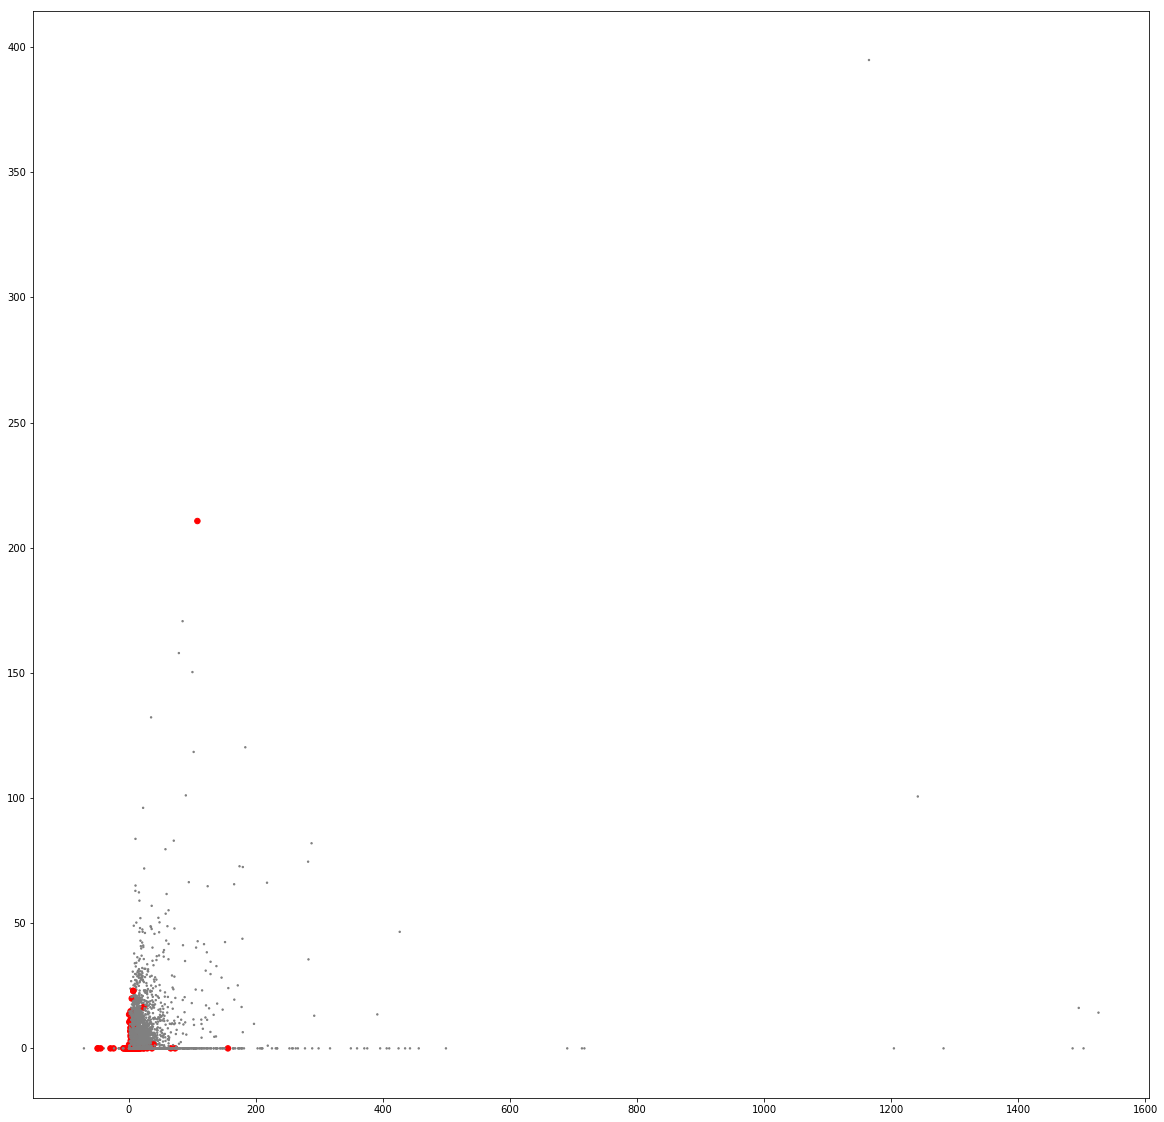

In [36]:
colors=['grey','red']
sizes=[2,30]
fig = plt.figure(figsize=(20,20))
plt.scatter(x=dftc['wealth'], y=dftc['debt to pay'],
            c=dftc["default-next"].apply(lambda x:colors[x]),
            s=dftc["default-next"].apply(lambda x:sizes[x])
           )
plt.savefig("vis/123.png")